In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.tri import Triangulation
import math
plt.style.use('seaborn')
plt.style.use('ggplot')

plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

In [4]:
def lookup(T_LitMod,P_LitMod,T,P):
	index=[]
#	dist=np.array((T[:]-T_LitMod)**2-( P[:]-P_LitMod)**2)
	dist=np.array(np.sqrt((T-T_LitMod)**2+(P-P_LitMod)**2));
	index=dist.argmin(); 
	#print index, T_LitMod,P_LitMod
	return index	
def find_mineral(file,P,T):
    wt=[]
    d=6 # title= [P(bar), T(oC), Vp(km/s)','Vs(km/s)','Vp/Vs','Density(kg/m3)','wt%','vol%','mol%'] this is column header
        # of the mineral file. I am only interested in weight percentage so I choose 6
        # In future if I want other properties to look at then I will pass this index as an argument to the function
        # as done for the Phase diagrams in LitMod2D_2.0
    #s=str(str( mineral) +".txt")
    Ol_data=np.loadtxt(file)
    if len(Ol_data) ==0:
        pass
    else:
        ## load the full tables for each material from Generator
        for i in range(len(P)):
          index=lookup(T[i],P[i],Ol_data[:,0],Ol_data[:,1])
          wt.append(Ol_data[index,d])
    
    return wt
def phase_diagram(data,path_to_minerals):
    Olivine = find_mineral(path_to_minerals+str('Ol.txt'),data[:,2],data[:,3])
    Orthopyroxene  = find_mineral(path_to_minerals+str('Opx.txt'),data[:,2],data[:,3])
    Clinopyroxene  = find_mineral(path_to_minerals+str('Cpx.txt'),data[:,2],data[:,3])
    Garnet         = find_mineral(path_to_minerals+str('Gt.txt'),data[:,2],data[:,3])
    Spinel         = find_mineral(path_to_minerals+str('Sp.txt'),data[:,2],data[:,3])
    Plagioclase    = find_mineral(path_to_minerals+str('Ph.txt'),data[:,2],data[:,3])
    Wadsleyite     = find_mineral(path_to_minerals+str('Wad.txt'),data[:,2],data[:,3])
    out = data[:,0]
    out=np.column_stack((out,data[:,1]))    
    out=np.column_stack((out,data[:,2]))    
    out=np.column_stack((out,data[:,3]))    
    out=np.column_stack((out,data[:,4]))
    out=np.column_stack((out,data[:,5]))
   
    out=np.column_stack((out,Olivine))
    out=np.column_stack((out,Orthopyroxene))
    out=np.column_stack((out,Clinopyroxene))
    out=np.column_stack((out,Garnet))
    out=np.column_stack((out,Spinel))
    out=np.column_stack((out,Plagioclase))
    out=np.column_stack((out,Wadsleyite))
    return out

In [8]:
data = np.loadtxt('./Phase_diagrams_ak135/NA_Age_vel_converted_ak135.txt',comments='#')

In [9]:
phase = phase_diagram(data,'./Phase_diagrams_ak135/')


In [10]:
np.savetxt('NA_Age_vel_converted_phases_ak135.txt',phase,header="#Age(Myr) depth(km) Pressure(bar) Temperature(oC) Density(kg/m3) Vs_diff(km/s) Olivine(wt%) Opx(wt%) Cpx(wt%) Garnet(wt%) Spinel(wt%) Plagioclase(wt%) Wadsleyite(%)",comments='',fmt='%10.3f')

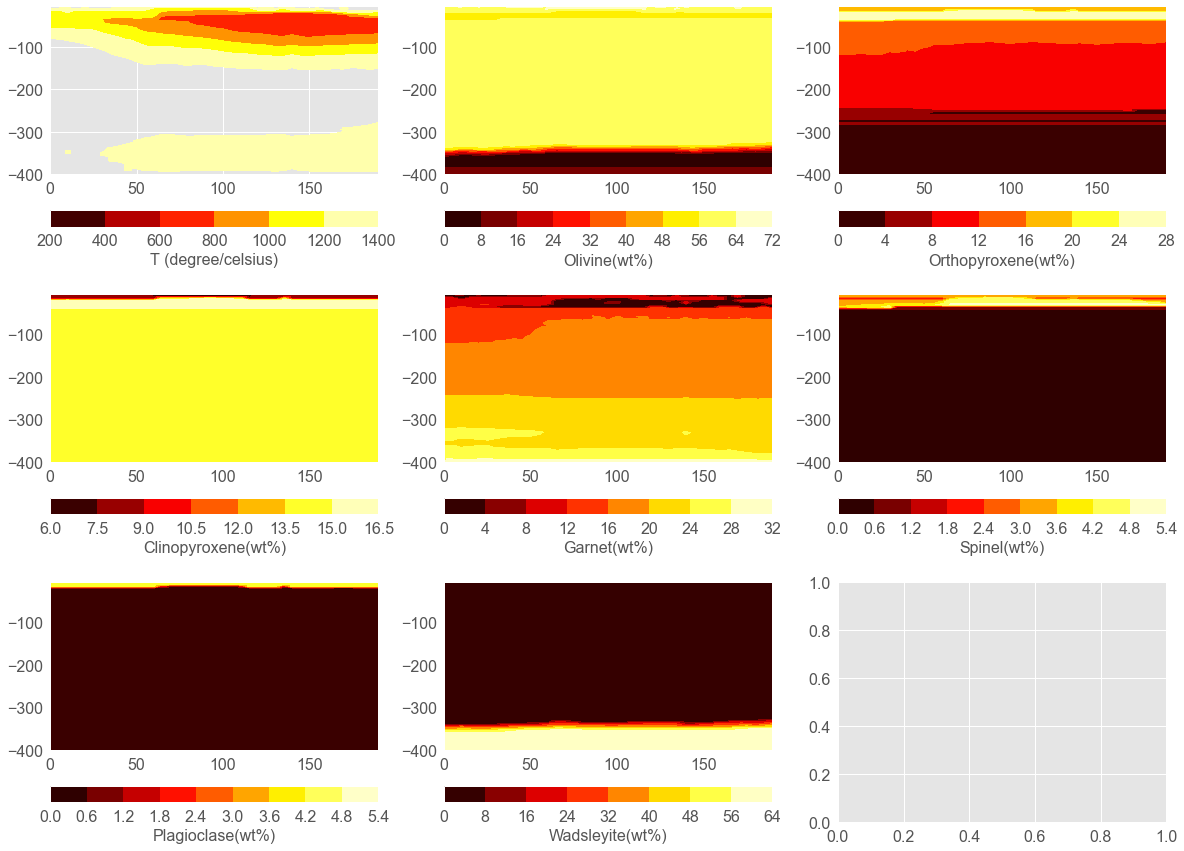

In [11]:
tri = Triangulation(phase[:,0],-phase[:,1])
fig, ax = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(20,15))
m_v_in_gibbs = ax[0][0].tricontourf(tri, phase[:,3],cmap='hot',levels=np.arange(200,1500,200))
#m_v_in_gibbs = ax[0].tricontour(tri, out_gibbs[:,1],cmap='hot',levels=np.arange(0,1400,100))
ol = ax[0][1].tricontourf(tri, phase[:,6] ,cmap='hot')
#m_v_in_goes = ax[1].tricontour(tri, MC.Result_T-273,cmap='hot',levels=np.arange(0,1400,100))
opx = ax[0][2].tricontourf(tri, phase[:,7],cmap='hot')
cpx = ax[1][0].tricontourf(tri, phase[:,8],cmap='hot')
garnet = ax[1][1].tricontourf(tri, phase[:,9],cmap='hot')
spinel = ax[1][2].tricontourf(tri, phase[:,10],cmap='hot')
plagioclase = ax[2][0].tricontourf(tri, phase[:,11],cmap='hot')
wd       = ax[2][1].tricontourf(tri, phase[:,12],cmap='hot')

#m_v_in_HS = ax[2].tricontour(tri, T_half_space,cmap='hot',levels=np.arange(0,1400,100))


'''
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
'''
fig.colorbar(m_v_in_gibbs, ax=ax[0][0], label='T (degree/celsius)', orientation='horizontal')
fig.colorbar(ol, ax=ax[0][1], label='Olivine(wt%)', orientation='horizontal')
fig.colorbar(opx, ax=ax[0][2], label='Orthopyroxene(wt%)', orientation='horizontal')
fig.colorbar(cpx, ax=ax[1][0], label='Clinopyroxene(wt%)', orientation='horizontal')
fig.colorbar(garnet, ax=ax[1][1], label='Garnet(wt%)', orientation='horizontal')
fig.colorbar(spinel, ax=ax[1][2], label='Spinel(wt%)', orientation='horizontal')
fig.colorbar(spinel, ax=ax[2][0], label='Plagioclase(wt%)', orientation='horizontal')
fig.colorbar(wd, ax=ax[2][1], label='Wadsleyite(wt%)', orientation='horizontal')

#ax[0].set_title('Gibbs')
#ax[1].set_title('Goes')
#ax[2].set_title('HSC Tm=1300')

#fig.colorbar(m_t_out, ax=ax[2], label='Temperature (Celcius)', orientation='horizontal')
#fig.colorbar(m_dens_out, ax=ax[3], label='Density (g/cm3)', orientation='horizontal')
#fig.suptitle(title, fontsize=16)
#ax.set_ylim([-400,0])
#ax.set_xlabel('Distance (km)')
#ax.set_ylabel('Depth (km)')
#fig.colorbar(m_v_in_gibbs, ax=ax[0], label='Temperature (degree/celcius)', orientation='vertical')

In [12]:
data = np.loadtxt('./Phase_diagrams_litmod/NA_Age_vel_converted_litmod.txt',comments='#')
phase = phase_diagram(data,'./Phase_diagrams_litmod/')
np.savetxt('NA_Age_vel_converted_phases_litmod.txt',phase,header="#Age(Myr) depth(km) Pressure(bar) Temperature(oC) Density(kg/m3) Vs_diff(km/s) Olivine(wt%) Opx(wt%) Cpx(wt%) Garnet(wt%) Spinel(wt%) Plagioclase(wt%) Wadsleyite(%)",comments='',fmt='%10.3f')

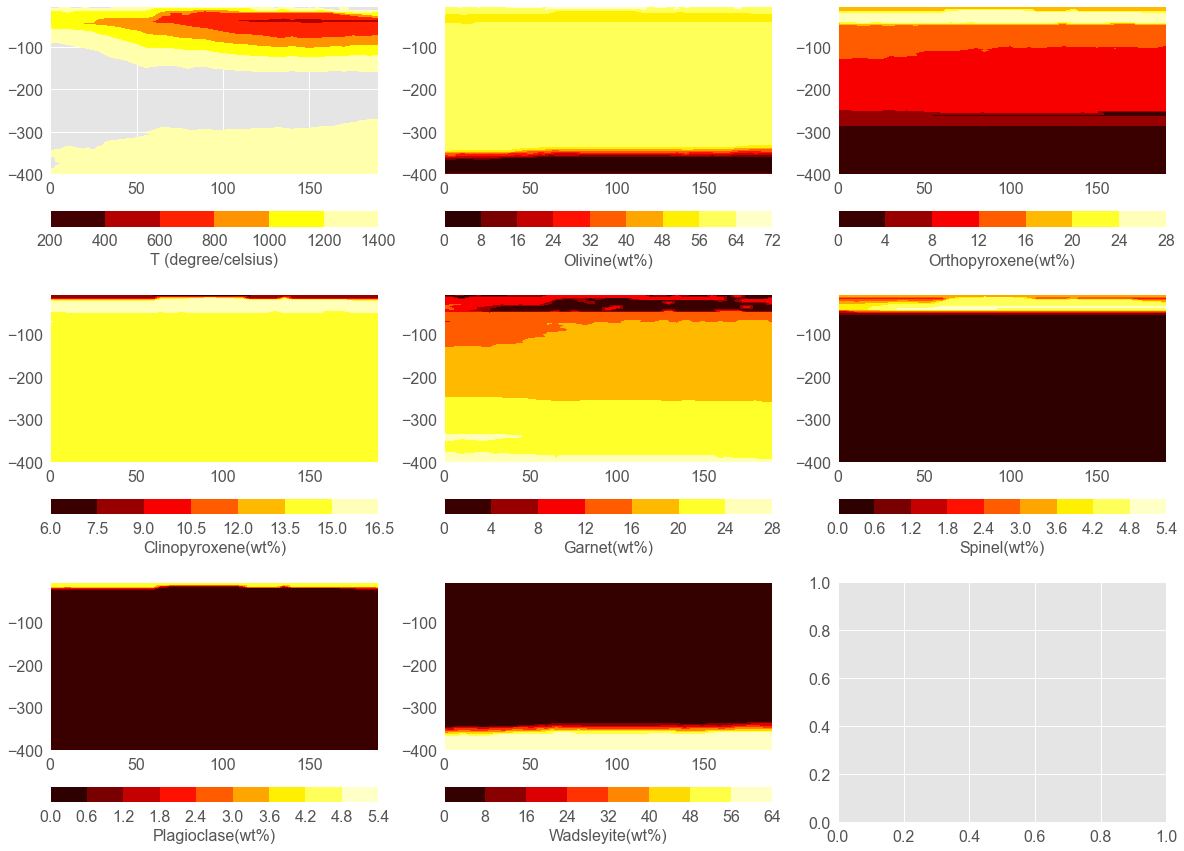

In [13]:
tri = Triangulation(phase[:,0],-phase[:,1])
fig, ax = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(20,15))
m_v_in_gibbs = ax[0][0].tricontourf(tri, phase[:,3],cmap='hot',levels=np.arange(200,1500,200))
#m_v_in_gibbs = ax[0].tricontour(tri, out_gibbs[:,1],cmap='hot',levels=np.arange(0,1400,100))
ol = ax[0][1].tricontourf(tri, phase[:,6] ,cmap='hot')
#m_v_in_goes = ax[1].tricontour(tri, MC.Result_T-273,cmap='hot',levels=np.arange(0,1400,100))
opx = ax[0][2].tricontourf(tri, phase[:,7],cmap='hot')
cpx = ax[1][0].tricontourf(tri, phase[:,8],cmap='hot')
garnet = ax[1][1].tricontourf(tri, phase[:,9],cmap='hot')
spinel = ax[1][2].tricontourf(tri, phase[:,10],cmap='hot')
plagioclase = ax[2][0].tricontourf(tri, phase[:,11],cmap='hot')
wd       = ax[2][1].tricontourf(tri, phase[:,12],cmap='hot')

#m_v_in_HS = ax[2].tricontour(tri, T_half_space,cmap='hot',levels=np.arange(0,1400,100))


'''
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
'''
fig.colorbar(m_v_in_gibbs, ax=ax[0][0], label='T (degree/celsius)', orientation='horizontal')
fig.colorbar(ol, ax=ax[0][1], label='Olivine(wt%)', orientation='horizontal')
fig.colorbar(opx, ax=ax[0][2], label='Orthopyroxene(wt%)', orientation='horizontal')
fig.colorbar(cpx, ax=ax[1][0], label='Clinopyroxene(wt%)', orientation='horizontal')
fig.colorbar(garnet, ax=ax[1][1], label='Garnet(wt%)', orientation='horizontal')
fig.colorbar(spinel, ax=ax[1][2], label='Spinel(wt%)', orientation='horizontal')
fig.colorbar(spinel, ax=ax[2][0], label='Plagioclase(wt%)', orientation='horizontal')
fig.colorbar(wd, ax=ax[2][1], label='Wadsleyite(wt%)', orientation='horizontal')

#ax[0].set_title('Gibbs')
#ax[1].set_title('Goes')
#ax[2].set_title('HSC Tm=1300')

#fig.colorbar(m_t_out, ax=ax[2], label='Temperature (Celcius)', orientation='horizontal')
#fig.colorbar(m_dens_out, ax=ax[3], label='Density (g/cm3)', orientation='horizontal')
#fig.suptitle(title, fontsize=16)
#ax.set_ylim([-400,0])
#ax.set_xlabel('Distance (km)')
#ax.set_ylabel('Depth (km)')
#fig.colorbar(m_v_in_gibbs, ax=ax[0], label='Temperature (degree/celcius)', orientation='vertical')

In [14]:
data = np.loadtxt('./Phase_diagrams_ak135_lith/NA_Age_vel_converted_ak135_lith.txt',comments='#')
phase = phase_diagram(data,'./Phase_diagrams_ak135_lith/')
np.savetxt('NA_Age_vel_converted_phases_ak135_lith.txt',phase,header="#Age(Myr) depth(km) Pressure(bar) Temperature(oC) Density(kg/m3) Vs_diff(km/s) Olivine(wt%) Opx(wt%) Cpx(wt%) Garnet(wt%) Spinel(wt%) Plagioclase(wt%) Wadsleyite(%)",comments='',fmt='%10.3f')

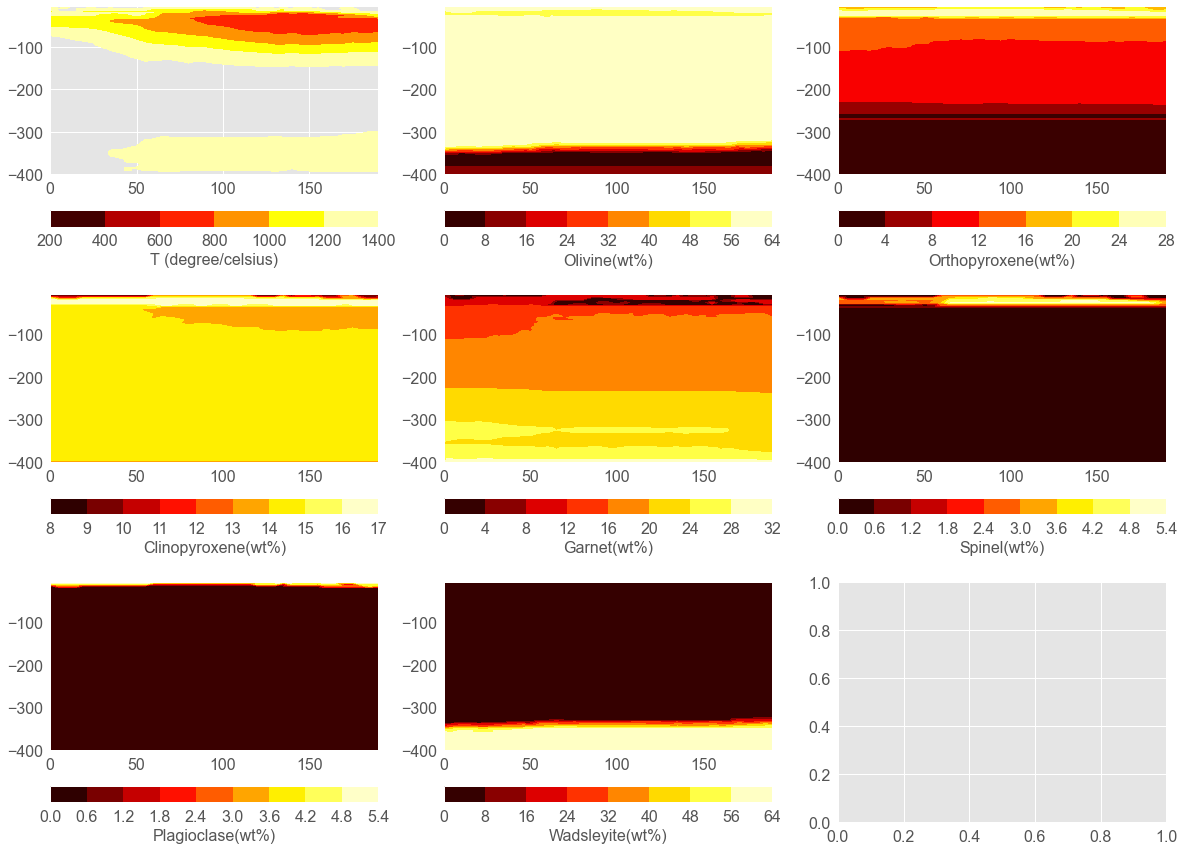

In [15]:
tri = Triangulation(phase[:,0],-phase[:,1])
fig, ax = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(20,15))
m_v_in_gibbs = ax[0][0].tricontourf(tri, phase[:,3],cmap='hot',levels=np.arange(200,1500,200))
#m_v_in_gibbs = ax[0].tricontour(tri, out_gibbs[:,1],cmap='hot',levels=np.arange(0,1400,100))
ol = ax[0][1].tricontourf(tri, phase[:,6] ,cmap='hot')
#m_v_in_goes = ax[1].tricontour(tri, MC.Result_T-273,cmap='hot',levels=np.arange(0,1400,100))
opx = ax[0][2].tricontourf(tri, phase[:,7],cmap='hot')
cpx = ax[1][0].tricontourf(tri, phase[:,8],cmap='hot')
garnet = ax[1][1].tricontourf(tri, phase[:,9],cmap='hot')
spinel = ax[1][2].tricontourf(tri, phase[:,10],cmap='hot')
plagioclase = ax[2][0].tricontourf(tri, phase[:,11],cmap='hot')
wd       = ax[2][1].tricontourf(tri, phase[:,12],cmap='hot')

#m_v_in_HS = ax[2].tricontour(tri, T_half_space,cmap='hot',levels=np.arange(0,1400,100))


'''
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
'''
fig.colorbar(m_v_in_gibbs, ax=ax[0][0], label='T (degree/celsius)', orientation='horizontal')
fig.colorbar(ol, ax=ax[0][1], label='Olivine(wt%)', orientation='horizontal')
fig.colorbar(opx, ax=ax[0][2], label='Orthopyroxene(wt%)', orientation='horizontal')
fig.colorbar(cpx, ax=ax[1][0], label='Clinopyroxene(wt%)', orientation='horizontal')
fig.colorbar(garnet, ax=ax[1][1], label='Garnet(wt%)', orientation='horizontal')
fig.colorbar(spinel, ax=ax[1][2], label='Spinel(wt%)', orientation='horizontal')
fig.colorbar(spinel, ax=ax[2][0], label='Plagioclase(wt%)', orientation='horizontal')
fig.colorbar(wd, ax=ax[2][1], label='Wadsleyite(wt%)', orientation='horizontal')

#ax[0].set_title('Gibbs')
#ax[1].set_title('Goes')
#ax[2].set_title('HSC Tm=1300')

#fig.colorbar(m_t_out, ax=ax[2], label='Temperature (Celcius)', orientation='horizontal')
#fig.colorbar(m_dens_out, ax=ax[3], label='Density (g/cm3)', orientation='horizontal')
#fig.suptitle(title, fontsize=16)
#ax.set_ylim([-400,0])
#ax.set_xlabel('Distance (km)')
#ax.set_ylabel('Depth (km)')
#fig.colorbar(m_v_in_gibbs, ax=ax[0], label='Temperature (degree/celcius)', orientation='vertical')